### Overview:
The goal of this analysis is to apply data science skills to a real-world scenario in the form of a mock census. This notebook goes through the data cleaning process, and then analyses the cleaned dataset to answer the following two questions:
1-What should be built on an unoccupied plot of land that the local government wishes to develop?
2- What should be invested in? (Employement, Schooling, Old age care....)

# First: Data Overview

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file
original_df = pd.read_csv('Census_data.csv')

In [3]:
# See the data
original_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Forks,Alice,Nicholson-Lowe,52,Head,Married,Female,Microbiologist,NaN,NaN
1,1,Scott Forks,Mitchell,Nicholson-Lowe,59,Husband,Married,Male,Homeopath,NaN,NaN
2,1,Scott Forks,Bernard,Nicholson-Lowe,14,Son,NaN,Male,Student,NaN,NaN
3,1,Scott Forks,Kieran,Nicholson-Lowe,13,Son,NaN,Male,Student,NaN,NaN
4,2,Scott Forks,Amy,Nicholls,41,Head,Married,Female,Publishing copy,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
9538,1,Baker Rocks,Neil,Douglas,47,NaN,Single,male,Translator,NaN,NaN
9539,1,Baker Rocks,Sylvia,Ali,34,NaN,Single,Female,"Engineer, drilling",NaN,Muslim
9540,1,Baker Rocks,Janet,Wall,26,NaN,Single,Female,Musician,NaN,Christian
9541,1,Baker Rocks,Jennifer,Matthews,53,NaN,Single,Female,Event organiser,NaN,Christian


In [4]:
# quick way to check column type and number of non null values
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9543 non-null   object
 1   Street                         9543 non-null   object
 2   First Name                     9543 non-null   object
 3   Surname                        9543 non-null   object
 4   Age                            9543 non-null   object
 5   Relationship to Head of House  8829 non-null   object
 6   Marital Status                 7350 non-null   object
 7   Gender                         9543 non-null   object
 8   Occupation                     9543 non-null   object
 9   Infirmity                      78 non-null     object
 10  Religion                       4115 non-null   object
dtypes: object(11)
memory usage: 820.2+ KB


In [5]:
# Checking the number of null values in each column 
original_df.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House     714
Marital Status                   2193
Gender                              0
Occupation                          0
Infirmity                        9465
Religion                         5428
dtype: int64

In [6]:
# Column quick informations
original_df.describe()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,9543,9543,9543,9543,9543,8829,7350,9543,9543,78,4115
unique,245,104,366,691,117,20,8,9,1107,7,13
top,1,Canary Avenue,Barbara,Smith,19,Head,Single,Female,Student,Physical Disability,Christian
freq,350,798,42,285,198,3342,3451,4880,1796,20,2172


## What We learned so far:
#### Columns : Relationship to Head of House, Marital Status, Infirmity and Religion contain null values
#### The rest of the columns, although don't appear at first glance to have missing values, they could hide other problems: Inconsistent values, blank entries, false information.
#### Next step is to examine each column

# Data Cleaning

In [7]:
# Before we start with any cleaning, we make a copy of the original data
df = original_df.copy()

### Age Column

In [8]:
df['Age'].unique()

array(['52', '59', '14', '13', '41', '43', '12', '76', '78', '48', '20',
       '16', '8', '39', '6', '1', '65', '66', '29', '26', '73', '38',
       '31', '34', '3', '0', '60', '62', '25', '22', '18', '56', '53',
       '19', '75', '36', '42', '35', '23', '49', '27', '89', '86', '11',
       '54', '24', '44', '45', '51', '55', '47', '21', '57', '68', '72',
       '40', '33', '30', '63', '50', '4', '71', '85', '10', '67', '64',
       '32', '2', '9', '5', '61', '15', '17', '7', '58', '81', '74', '77',
       '46', '69', '80', '37', '28', '83', '79', '70', '92', '84', '93',
       '82', '79.77226286', '82.77226286', '87', '103', '95', '106', '88',
       '100', '91', '90.6967748', '96', '105', '94', '102', '104', '108',
       '90', 'twenty eight', '107', '98', ' ', '80.58881184', '97',
       '62.70684789', '61.70684789', '71.43034858', '72.43034858'],
      dtype=object)

In [ ]:
'''
Problems detected:
- Float values
- One entry with letters
- One Blank
'''

In [10]:
# Find the row with the blank entry
original_df[original_df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6487,227,White Branch,Reece,Riley,,Son,NaN,Male,Child,NaN,NaN


In [11]:
# Replace the age value
df['Age'] = df['Age'].replace('twenty eight', '28')

# Convert to numeric, round floats, and handle invalid entries
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').round().astype('Int64')

# Guessing the age using this key information: Occupation -> Child, age should be between 0 and 4
children = df[df['Age'].between(0, 4, inclusive='both')]
median_child_age = children['Age'].median() # use the median age of children to impute the blank entry
df.at[6487, 'Age'] = median_child_age

### Gender column

In [12]:
df['Gender'].unique()

array(['Female', 'Male', 'M', 'male', 'F', 'female', 'f', 'm', ' '],
      dtype=object)

In [ ]:
'''
Problems:
- No standarized format for Female and Male
- Blank Entry
'''

In [14]:
# Find the blank Row
df[df['Gender'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8713,15,Spencer Avenue,Mary,Brooks,58,Head,Single,,Unemployed,NaN,Christian


In [15]:
# Standarize the column to have : Male / Female
gender_mapping = {
    'male': 'Male',
    'M': 'Male',
    'm': 'Male',
    'Male': 'Male',  
    'female': 'Female',
    'F': 'Female',
    'f': 'Female',
    'Female': 'Female'
}
# Apply the mapping to standardize values
df['Gender'] = df['Gender'].map(gender_mapping)

# Gueesing from the First Name: Mary, to be a female
df.at[8713, 'Gender'] = 'Female'

In [16]:
# Checking if it got fixed
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Surname Column

In [17]:
df[df['Surname'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
975,31,Newrywalk Drive,Lindsey,,52,Head,Married,Female,"Sales professional, IT",NaN,Christian
8265,27,Pilgrim Drive,Ellie,,2,Daughter,NaN,Female,Child,NaN,NaN


In [ ]:
'''
Problems:
-Two blank entries

We can impute based on the Relationship to head of House and Gender
'''

In [19]:
df[(df['House Number'] == '31') & (df['Street'] == 'Newrywalk Drive') ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
975,31,Newrywalk Drive,Lindsey,,52,Head,Married,Female,"Sales professional, IT",NaN,Christian
976,31,Newrywalk Drive,Wayne,Williams,56,Husband,Married,Male,Training and development officer,NaN,Christian
977,31,Newrywalk Drive,Anne,Williams,16,Daughter,NaN,Female,Student,NaN,NaN


In [20]:
# The person lives with 2 other people with the same  surname, and their relationship to her is Husband and Daughter, surely her surname will be the same
df.at[975, 'Surname'] = 'Williams'

In [21]:
df[(df['House Number'] == '27') & (df['Street'] == 'Pilgrim Drive')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8263,27,Pilgrim Drive,Howard,Hughes,43,Head,Married,Male,Radio broadcast assistant,NaN,Christian
8264,27,Pilgrim Drive,Susan,Hughes,38,Wife,Married,Female,Bonds trader,NaN,NaN
8265,27,Pilgrim Drive,Ellie,,2,Daughter,NaN,Female,Child,NaN,NaN
8266,27,Pilgrim Drive,Sharon,Hughes,0,Daughter,NaN,Female,Child,NaN,NaN


In [22]:
# Same logic was applied here
df.at[8265, 'Surname'] = 'Hughes'

### House Number Column

In [23]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Two', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '1

In [ ]:
'''
Problems:
- One entry with letters
'''

In [25]:
# Find the row
df[df['House Number'] == 'Two']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
42,Two,Fish Lane,Gregory,Dixon,75,Head,Widowed,Male,Retired Barrister,NaN,Christian


In [26]:
# Replace it with the numeric value
df.at[42, 'House Number'] = '2'

### Occupation column

In [27]:
df[df['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5688,6,Elyarch Drive,Toby,Richardson,42,Lodger,Single,Male,,NaN,Christian


In [28]:
df.at[5688, 'Occupation'] = 'Unknown'

In [29]:
# One blank entry replaced with Unknown
df[df['Occupation'] == 'Unknown']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5688,6,Elyarch Drive,Toby,Richardson,42,Lodger,Single,Male,Unknown,NaN,Christian


### Marital Status Column

In [30]:
df['Marital Status'].unique()

array(['Married', nan, 'Widowed', 'Single', 'Divorced', 'S', 'D', 'M',
       'W'], dtype=object)

In [ ]:
'''
Problems:
-Values are not standardized
-nan values
'''

In [32]:
# Checking if NaN values are present in adults
df[(df['Age']>= 18) & (df['Marital Status'].isna())]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [ ]:
'''No missing values in adults. Which leaves people under 18. Impute with N/A'''

In [34]:
# Dictionary for mapping
marital_mapping = {
    'Married': 'Married',
    'M': 'Married', 
    'Widowed': 'Widowed',
    'W': 'Widowed',
    'Single': 'Single',
    'S': 'Single',
    'Divorced': 'Divorced',
    'D': 'Divorced',
}

df['Marital Status'] = df['Marital Status'].map(marital_mapping)
df['Marital Status'] = df['Marital Status'].fillna('N/A')

In [35]:
df['Marital Status'].unique()

array(['Married', 'N/A', 'Widowed', 'Single', 'Divorced'], dtype=object)

In [36]:
# Checking for the possibility of finding entries 
df[(df['Age'] < 18) & (df['Marital Status'] != 'N/A')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1267,12,Outer Avenue,Laura,Thompson,17,Head,Divorced,Female,Student,NaN,NaN
8349,37,Badger Shoal,Amber,Ball,17,Head,Single,Female,Student,NaN,NaN


In [ ]:
'''Two rows where the person is less than 18, but have a Marital Status and both are heads. The easiest fix is to update the ages to 18
   To fit the description given'''

In [38]:
df.at[1267, 'Age'] = 18
df.at[8349, 'Age'] = 18

In [39]:
df['Marital Status'].unique()

array(['Married', 'N/A', 'Widowed', 'Single', 'Divorced'], dtype=object)

### Relationship to head of House Column

In [40]:
df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Son', 'Daughter', 'Visitor', 'Wife', 'Cousin',
       nan, 'Partner', 'Granddaughter', 'Lodger', 'Nephew', 'Sibling',
       'Neice', 'Grandson', 'Adopted Son', 'Adopted Daughter', 'Step-Son',
       'Step-Daughter', 'Adopted Grandson', 'Adopted Granddaughter'],
      dtype=object)

In [ ]:
'''
This was the most complicated column to clean. 
-Lots of Nan Values
-Imputing requires a lot of guess work. Features like Marital Status, Age, Surname and Gender helped making an educated guess
-Some visualisations were used to have a better idea on how to tackle the column
'''

In [42]:
head_count = df.groupby(['House Number', 'Street'])['Relationship to Head of House'].apply(lambda x: (x == 'Head').sum())
no_head_households = head_count[head_count == 0].index
multiple_head_households = head_count[head_count > 1].index

print(f"Households with no Head: {len(no_head_households)}")
print(f"Households with multiple Heads: {len(multiple_head_households)}")

Households with no Head: 0
Households with multiple Heads: 10


In [ ]:
'''
Every household has a head, and 10 of them have more than one. Decided to not change anything in those houses as they are very few
and won't have an impact
'''

In [44]:
head_count = pd.DataFrame(head_count)

In [45]:
# The 10 Houses have 2 heads
head_count[head_count['Relationship to Head of House'] != 1]

,,Relationship to Head of House
House Number,Street,
1,Haymarket Street,2
10,Haymarket Street,2
2,Haymarket Street,2
3,Haymarket Street,2
4,Haymarket Street,2
5,Haymarket Street,2
6,Haymarket Street,2
7,Haymarket Street,2
8,Haymarket Street,2


In [46]:
df['Relationship to Head of House'].value_counts()

Relationship to Head of House
Head                     3342
Son                      1618
Daughter                 1571
Husband                   949
Lodger                    421
Wife                      333
Partner                   242
Granddaughter              84
Grandson                   79
Sibling                    51
Cousin                     32
Visitor                    28
Step-Daughter              18
Step-Son                   15
Adopted Son                14
Adopted Daughter           13
Nephew                      9
Neice                       7
Adopted Grandson            2
Adopted Granddaughter       1
Name: count, dtype: int64

C:\Users\seif\AppData\Local\Temp\ipykernel_19028\1060193660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_df['Age Group'] = pd.cut(missing_df['Age'], bins=bins, labels=labels, right=True)


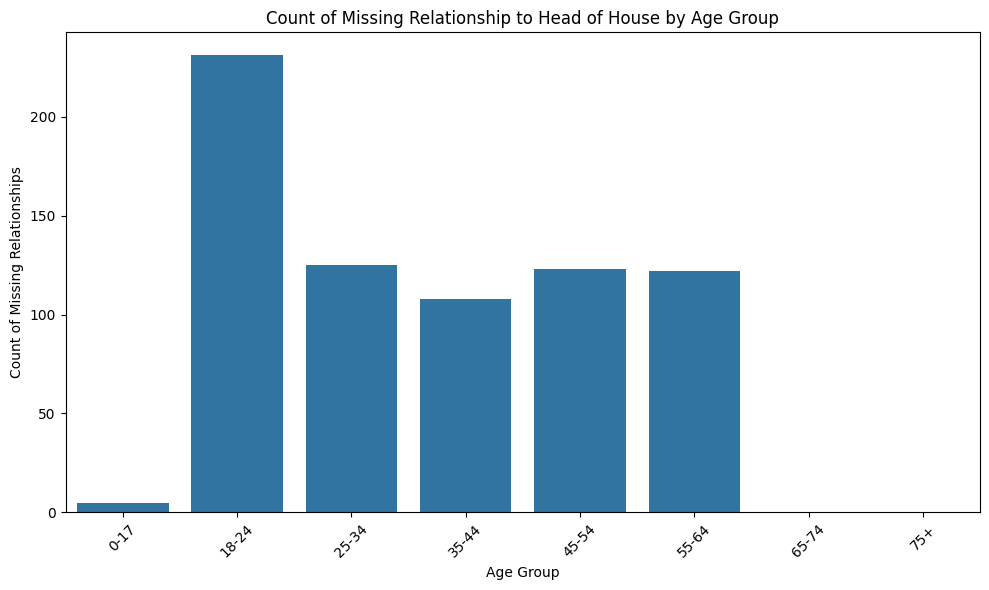

Missing Relationship Counts by Age Group:
Age Group
0-17       5
18-24    231
25-34    125
35-44    108
45-54    123
55-64    122
65-74      0
75+        0
Name: count, dtype: int64


In [47]:
# Checking which age group with the most missing values
# Filter rows with missing Relationship to Head of House
missing_df = df[df['Relationship to Head of House'].isna()]

# Define age groups (customize bins as needed)
bins = [0, 17, 24, 34, 44, 54, 64, 74, float('inf')]  # 0-17 (minors), 18-34, 35-54, 55-74, 75+
labels = ['0-17','18-24', '25-34', '35-44', '45-54', '55-64' , '65-74', '75+']
missing_df['Age Group'] = pd.cut(missing_df['Age'], bins=bins, labels=labels, right=True)

# Count missing values per age group
age_group_counts = missing_df['Age Group'].value_counts().reindex(labels, fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count of Missing Relationships')
plt.title('Count of Missing Relationship to Head of House by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Print the counts for reference
print("Missing Relationship Counts by Age Group:")
print(age_group_counts)

In [48]:
# Checking if one of the genders is more likely to have a missing value
missing_df['Gender'].value_counts()

Gender
Female    358
Male      356
Name: count, dtype: int64

In [ ]:
'''
From the analysis of the column,  the most common types of relation (Excluding head) are: Son, Daughter, Husband, Lodger and Wife
The age group with the biggest number of missing values is 18-24 (meaning possibly Son, Daughter or Lodger)

Two ways we can handle this: Impute based on rules or train a classifier model, like Random Forest to predict the relation

In the end, i opted in using rules to impute, for two reasons, One, the imputation using rules is explainable, because We define the rules. Second,
The random forest classifier, to effectively predict, needs to be feeded Households to learn the relation, and all memebers of the house must not have 
a null value and with limited data not gonna work properly
'''

In [50]:
# Function to impute the relationship based on rules
def impute_relationship(row):
    if pd.isna(row['Relationship to Head of House']):
        # Extract the useful features from the row
        age = row['Age']
        gender = row['Gender']
        marital_status = row['Marital Status']
        surname = row['Surname']
        household = df[(df['House Number'] == row['House Number']) & (df['Street'] == row['Street'])]
        
        # Check for multiple Heads
        head_count = (household['Relationship to Head of House'] == 'Head').sum()
        if head_count > 1:
            return 'Lodger'  # Assign 'Lodger' if more than one Head
        
        # Get Head info for remaining cases
        head = household[household['Relationship to Head of House'] == 'Head'].iloc[0]
        head_surname = head['Surname']
        age_diff = head['Age'] - age
        
        # Age-group rules for single-Head households
        if age <= 17:
            if age_diff >= 40:
                return 'Grandson' if gender == 'Male' else 'Granddaughter'
            else:
                return 'Son' if gender == 'Male' else 'Daughter'
        elif 18 <= age <= 24:
            if surname == head_surname:
                if age_diff > 18:
                    return 'Son' if gender == 'Male' else 'Daughter'
                elif marital_status == 'Married':
                    return 'Husband' if gender == 'Male' else 'Wife'
                else:
                    return 'Sibling'
            else:
                return 'Lodger' if marital_status == 'Single' else 'Partner'
        elif 25 <= age <= 34:
            if surname == head_surname and marital_status == 'Married':
                return 'Husband' if gender == 'Male' else 'Wife'
            elif surname == head_surname:
                return 'Sibling'
            else:
                return 'Partner' if marital_status in ['Married', 'Single'] else 'Lodger'
        elif 35 <= age <= 54:
            if surname == head_surname and marital_status == 'Married':
                return 'Husband' if gender == 'Male' else 'Wife'
            elif surname == head_surname:
                return 'Sibling'
            else:
                return 'Lodger'
        elif 55 <= age <= 64:
            if surname == head_surname:
                return 'Sibling'
            else:
                return 'Visitor' if age_diff > 20 else 'Lodger'
        return 'Unknown'
    return row['Relationship to Head of House']


In [51]:
#Capture counts BEFORE imputation 
before_df = df.copy()  # Copy original data before any changes
before_counts = before_df['Relationship to Head of House'].value_counts(dropna=False)
before_data = pd.DataFrame({
    'Relationship': before_counts.index,
    'Count': before_counts.values,
    'Stage': 'Before'
}).reset_index(drop=True)

before_data

,Relationship,Count,Stage
0,Head,3342,Before
1,Son,1618,Before
2,Daughter,1571,Before
3,Husband,949,Before
4,NaN,714,Before
5,Lodger,421,Before
6,Wife,333,Before
7,Partner,242,Before
8,Granddaughter,84,Before
9,Grandson,79,Before


In [52]:
fix_relation_df = df.copy()
# Apply the imputation
fix_relation_df['Relationship to Head of House'] = fix_relation_df.apply(impute_relationship, axis=1)

In [53]:
#Capture counts AFTER imputation
after_counts = fix_relation_df['Relationship to Head of House'].value_counts()
after_data = pd.DataFrame({
    'Relationship': after_counts.index,
    'Count': after_counts.values,
    'Stage': 'After'
}).reset_index(drop=True)

# Combine before and after data
combined_data = pd.concat([before_data, after_data], ignore_index=True)

combined_data


,Relationship,Count,Stage
0,Head,3342,Before
1,Son,1618,Before
2,Daughter,1571,Before
3,Husband,949,Before
4,NaN,714,Before
5,Lodger,421,Before
6,Wife,333,Before
7,Partner,242,Before
8,Granddaughter,84,Before
9,Grandson,79,Before


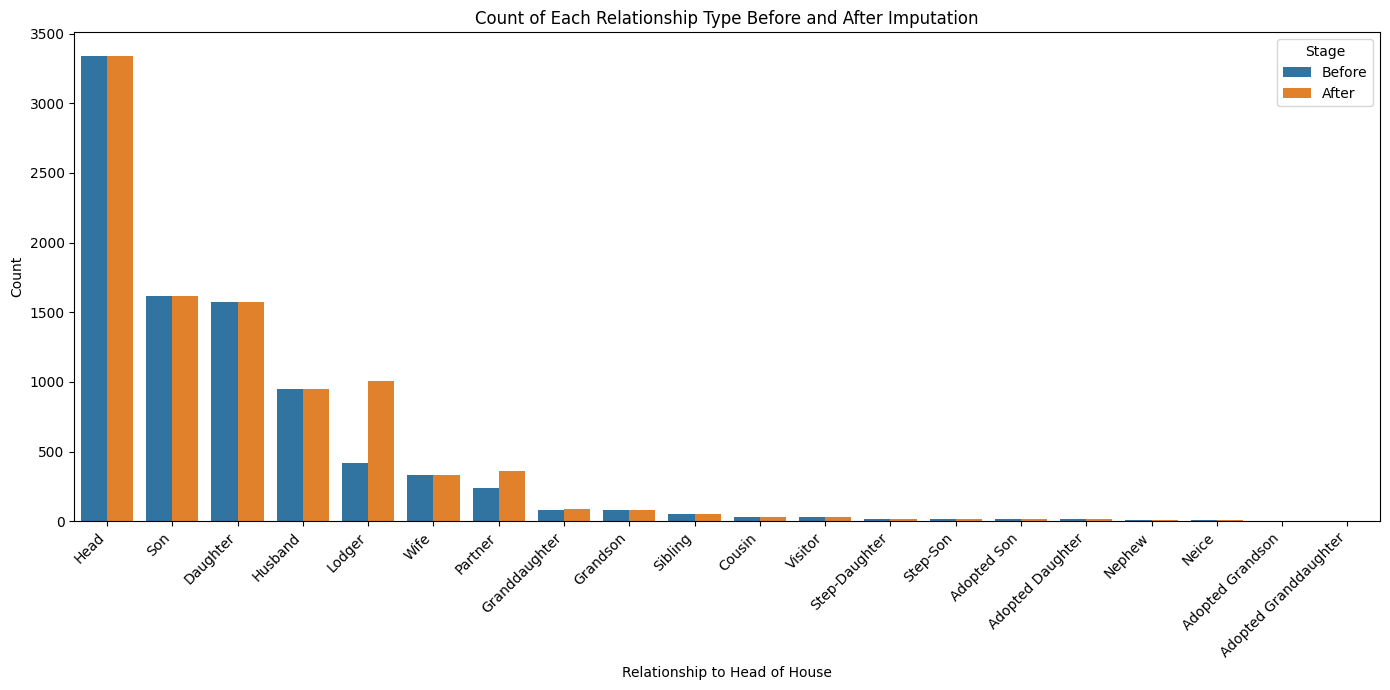

Counts Before and After Imputation:


,Relationship,Before,After
0,Adopted Daughter,13,13
1,Adopted Granddaughter,1,1
2,Adopted Grandson,2,2
3,Adopted Son,14,14
4,Cousin,32,32
5,Daughter,1571,1571
6,Granddaughter,84,85
7,Grandson,79,83
8,Head,3342,3342
9,Husband,949,949


In [54]:
# Plot before and after in one bar plot for visual comparison
plt.figure(figsize=(14, 7))
sns.barplot(data=combined_data, x='Relationship', y='Count', hue='Stage', dodge=True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Relationship to Head of House')
plt.ylabel('Count')
plt.title('Count of Each Relationship Type Before and After Imputation')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()

all_relationships = pd.Index(before_counts.index).union(after_counts.index)

# Reindex both counts to include all relationships, fill missing with 0
before_counts_full = before_counts.reindex(all_relationships, fill_value=0)
after_counts_full = after_counts.reindex(all_relationships, fill_value=0)

# Combine into a single dataframe
counts_df = pd.DataFrame({
    'Relationship': all_relationships,
    'Before': before_counts_full.values,
    'After': after_counts_full.values
})

# Reset index if you prefer 'Relationship' as a column rather than index
counts_df = counts_df.reset_index(drop=True)

# Display the dataframe
print("Counts Before and After Imputation:")
counts_df

In [55]:
df['Relationship to Head of House'] = fix_relation_df['Relationship to Head of House']

### Religion Column

In [56]:
df['Religion'].unique()

array([nan, 'Christian', 'Catholic', 'Muslim', 'Methodist', 'Jewish',
       'Sikh', 'Nope', 'Undecided', 'Jedi', 'Orthodoxy', 'Pagan',
       'Agnostic', 'Housekeeper'], dtype=object)

In [ ]:
'''Problems:
-Some of the religions are invalid
-NaN values
'''

In [58]:
# First remove the invalid religions and replace them with Nan
invalid_religions = ['Nope', 'Undecided', 'Jedi', 'Housekeeper']
df['Religion'] = df['Religion'].replace(invalid_religions, np.nan)

In [59]:
religion_counts = df['Religion'].value_counts()
religion_counts_df= pd.DataFrame({
    'Religion': religion_counts.index,
    'Count': religion_counts.values,
}).reset_index(drop=True)

In [60]:
religion_counts_df

,Religion,Count
0,Christian,2172
1,Catholic,1043
2,Methodist,671
3,Muslim,124
4,Sikh,56
5,Jewish,37
6,Orthodoxy,2
7,Agnostic,2
8,Pagan,1


In [61]:
#Define a function to impute religion within a household
def impute_religion_house(group):
    # Non-missing religions in the house
    non_missing = group['Religion'].dropna()
    
    if len(non_missing) == 0:
        # All missing in house, will handle via street mode later
        return group
    elif len(non_missing.unique()) == 1:
        # One unique religion, fill all with it
        group['Religion'] = group['Religion'].fillna(non_missing.iloc[0])
    else:
        # Multiple religions, use mode
        mode_religion = non_missing.mode().iloc[0]
        group['Religion'] = group['Religion'].fillna(mode_religion)
    
    return group

#Handle houses with all missing religions using street mode
def impute_religion_street(street_group):
    # Check houses within the street
    still_missing = street_group[street_group['Religion'].isna()]
    if len(still_missing) > 0:
        # Get mode of non-missing religions on the street
        street_non_missing = street_group['Religion'].dropna()
        if len(street_non_missing) > 0:  # Use street mode if available
            street_mode = street_non_missing.mode().iloc[0]
            street_group['Religion'] = street_group['Religion'].fillna(street_mode)
        else:  # Use global mode if street has no valid religions
            street_group['Religion'] = street_group['Religion'].fillna('Christian')
    return street_group



In [62]:
# Apply house-level imputation
df= df.groupby(['House Number', 'Street'], group_keys=False).apply(impute_religion_house)


# Apply street-level imputation for remaining NaN
df = df.groupby('Street', group_keys=False).apply(impute_religion_street)

# Verify results
print("Religion counts after imputation:")
print(df['Religion'].value_counts(dropna=False))
print(f"Remaining NaN in Religion: {df['Religion'].isna().sum()}")


Religion counts after imputation:
Religion
Christian    5892
Catholic     2123
Methodist    1176
Muslim        189
Sikh           94
Jewish         56
Agnostic       10
Orthodoxy       2
Pagan           1
Name: count, dtype: int64
Remaining NaN in Religion: 0


C:\Users\seif\AppData\Local\Temp\ipykernel_19028\2894434565.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df= df.groupby(['House Number', 'Street'], group_keys=False).apply(impute_religion_house)
C:\Users\seif\AppData\Local\Temp\ipykernel_19028\2894434565.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Street', group_keys=False).apply(impute_religion_street)


In [63]:
df['Religion'].unique()

array(['Christian', 'Catholic', 'Muslim', 'Methodist', 'Jewish', 'Sikh',
       'Orthodoxy', 'Pagan', 'Agnostic'], dtype=object)

### Infirmity Column

In [64]:
df['Infirmity'].unique()

array([nan, 'Mental Disability', 'Physical Disability',
       'Unknown Infection', ' ', 'Blind', 'Deaf', 'Disabled'],
      dtype=object)

In [65]:
df['Infirmity'].value_counts()

Infirmity
Physical Disability    20
Unknown Infection      18
                       15
Mental Disability       7
Blind                   7
Deaf                    6
Disabled                5
Name: count, dtype: int64

In [ ]:
'''
Problems:
-Most entries are blank, no clear way to determine the infirmity, will be filled with "Unknown"
'''

In [67]:
df['Infirmity'] = df['Infirmity'].replace(' ', 'Unknown')
df['Infirmity'] = df['Infirmity'].replace(np.nan, 'Unknown')

In [68]:
df['Infirmity'].value_counts()

Infirmity
Unknown                9480
Physical Disability      20
Unknown Infection        18
Mental Disability         7
Blind                     7
Deaf                      6
Disabled                  5
Name: count, dtype: int64

In [69]:
df.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [70]:
# Save the new clean dataset into a CSV file
output_filename = 'cleaned_dataset.csv'
df.to_csv(output_filename, index=False)

# Analysis Part

### Age Distribution

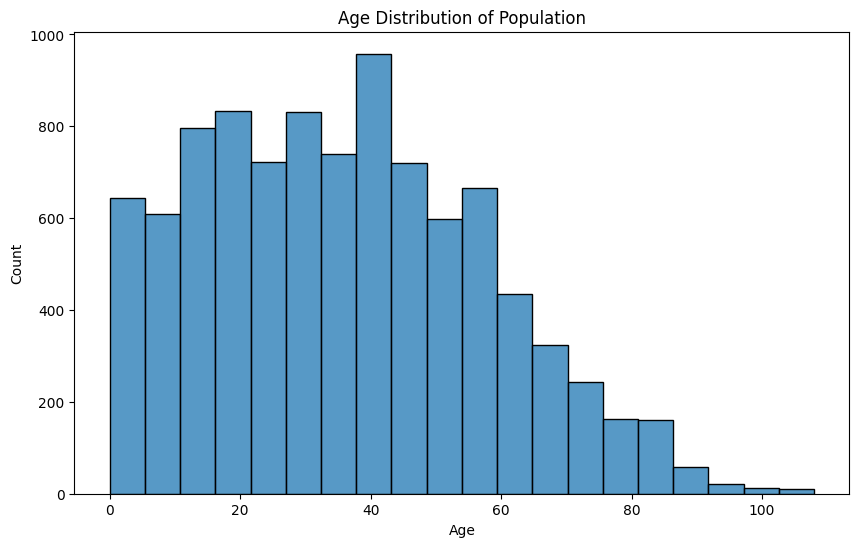

Children (0-17): 2193 (22.98%)
Working Age (18-64): 6358 (66.62%)
Retirees (65+): 992 (10.40%)


In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution of Population')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig("age_distribution.png")
plt.show()

# Key age groups
children = len(df[df['Age'] <= 17])  # School-age (0-16)
working_age = len(df[(df['Age'] >= 18) & (df['Age'] <= 64)])  # 18-64
retirees = len(df[df['Age'] >= 65])  # 65+
total_pop = len(df)

print(f"Children (0-17): {children} ({children/total_pop:.2%})")
print(f"Working Age (18-64): {working_age} ({working_age/total_pop:.2%})")
print(f"Retirees (65+): {retirees} ({retirees/total_pop:.2%})")

### Age Pyramid

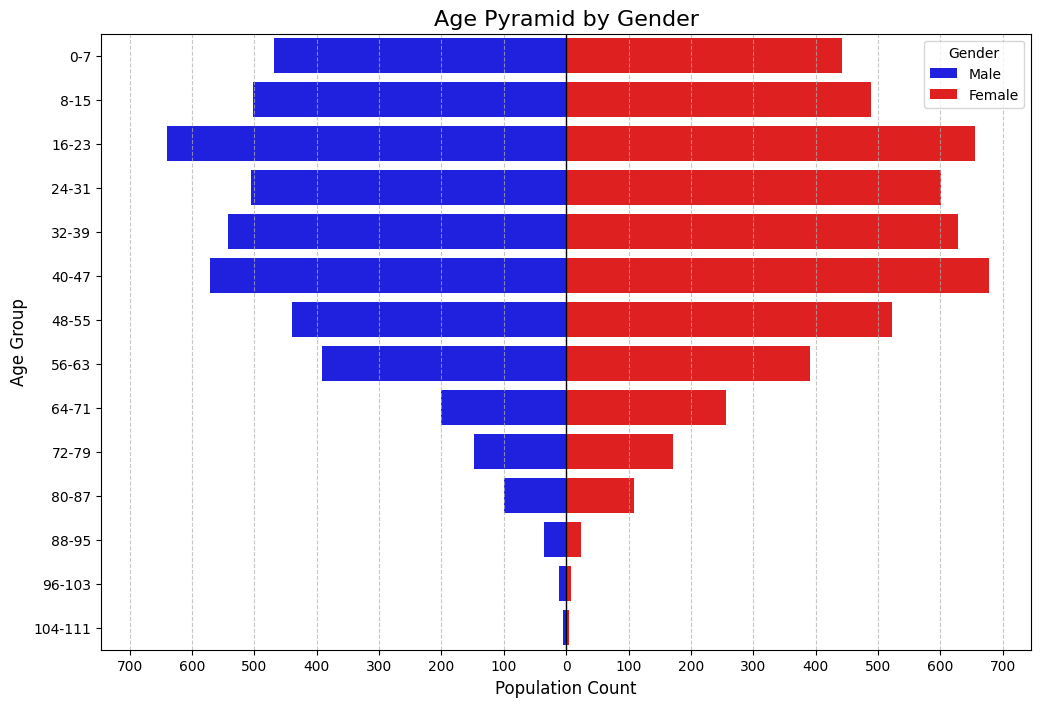

Total Males: 4562 (47.80%)
Total Females: 4981 (52.20%)

Male Age Breakdown:
Children (0-16): 1045 (22.91%)
Working Age (17-64): 3057 (67.01%)
Retirees (65+): 460 (10.08%)

Female Age Breakdown:
Children (0-16): 1004 (20.16%)
Working Age (17-64): 3445 (69.16%)
Retirees (65+): 532 (10.68%)


In [72]:
age_bins = range(0, 115, 8)  # 0-4, 5-9, ..., 110-114
age_labels = [f'{i+1}-{i+8}' for i in range(-1, 110, 8)]  # 0-4, 5-9, ..., 105-109

# Group by age bins and gender
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_gender_counts = df.groupby(['Age_Group', 'Gender'], observed=True).size().unstack(fill_value=0)

# Prepare data for pyramid: Males negative, Females positive
age_gender_counts['Male'] = -age_gender_counts['Male']  # Negative for left side

# Create the age pyramid
plt.figure(figsize=(12, 8))
sns.barplot(x='Male', y=age_gender_counts.index, data=age_gender_counts, color='blue', label='Male')
sns.barplot(x='Female', y=age_gender_counts.index, data=age_gender_counts, color='red', label='Female')

# Customize plot
plt.title('Age Pyramid by Gender', fontsize=16)
plt.xlabel('Population Count', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.axvline(0, color='black', linewidth=1)  # Central axis
plt.legend(title='Gender')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set symmetric x-axis starting at 0
max_count = max(age_gender_counts['Male'].abs().max(), age_gender_counts['Female'].max())
step = 100  # Adjust step size as needed (e.g., 50, 100, 200)
ticks = list(range(0, int(max_count) + step, step))  # Positive ticks: 0, 100, 200, ...
xticks = [-x for x in ticks[::-1] if x != 0] + ticks  # Symmetric: -500, -400, ..., 0, 100, ...
plt.xlim(-max_count * 1.1, max_count * 1.1)  # Add padding
plt.xticks(ticks=xticks, labels=[abs(x) for x in xticks])  # Labels as absolute values
plt.savefig("age_pyramid.png")
plt.show()

# Summary stats
total_male = df['Gender'].value_counts()['Male']
total_female = df['Gender'].value_counts()['Female']
print(f"Total Males: {total_male} ({total_male/len(df):.2%})")
print(f"Total Females: {total_female} ({total_female/len(df):.2%})")

# Key age groups by gender
for gender in ['Male', 'Female']:
    print(f"\n{gender} Age Breakdown:")
    children = df[(df['Gender'] == gender) & (df['Age'] <= 16)].shape[0]
    working = df[(df['Gender'] == gender) & (df['Age'].between(17, 64))].shape[0]
    retirees = df[(df['Gender'] == gender) & (df['Age'] >= 65)].shape[0]
    print(f"Children (0-16): {children} ({children/total_male if gender == 'Male' else children/total_female:.2%})")
    print(f"Working Age (17-64): {working} ({working/total_male if gender == 'Male' else working/total_female:.2%})")
    print(f"Retirees (65+): {retirees} ({retirees/total_male if gender == 'Male' else retirees/total_female:.2%})")

### House Hold Occupancy

Occupancy Stats:
count    3332.000000
mean        2.864046
std         2.119474
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
dtype: float64


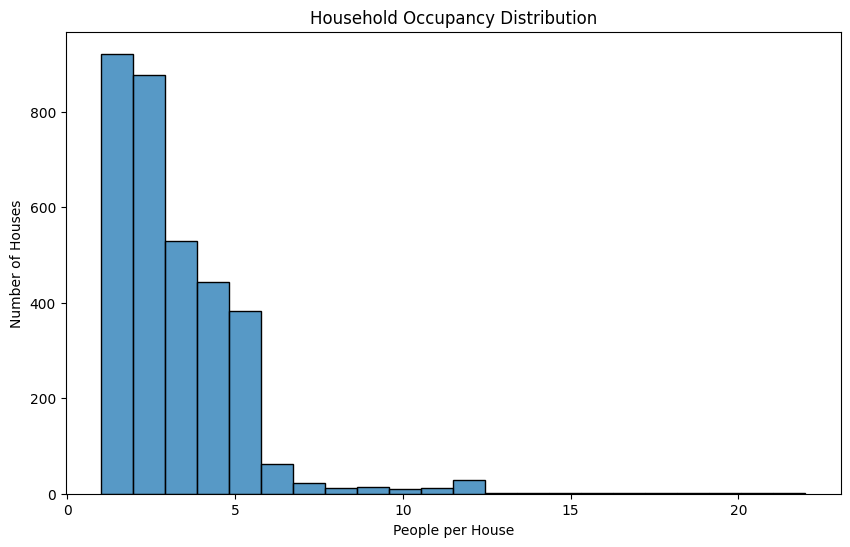

In [73]:
occupancy = df.groupby(['House Number', 'Street']).size()
print("Occupancy Stats:")
print(occupancy.describe())

plt.figure(figsize=(10, 6))
sns.histplot(occupancy, bins=22)
plt.title('Household Occupancy Distribution')
plt.xlabel('People per House')
plt.ylabel('Number of Houses')
plt.savefig("Household_Occupancy_Distribution.png")
plt.show()

### Marital Status By age distribution

Marital Status Distribution (Excluding Children):
Marital Status
Single      3456
Married     2574
N/A         2193
Divorced     910
Widowed      410
Name: count, dtype: int64


C:\Users\seif\AppData\Local\Temp\ipykernel_19028\1580589075.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Marital Status', y='Age', data=df_adults, palette='tab10')


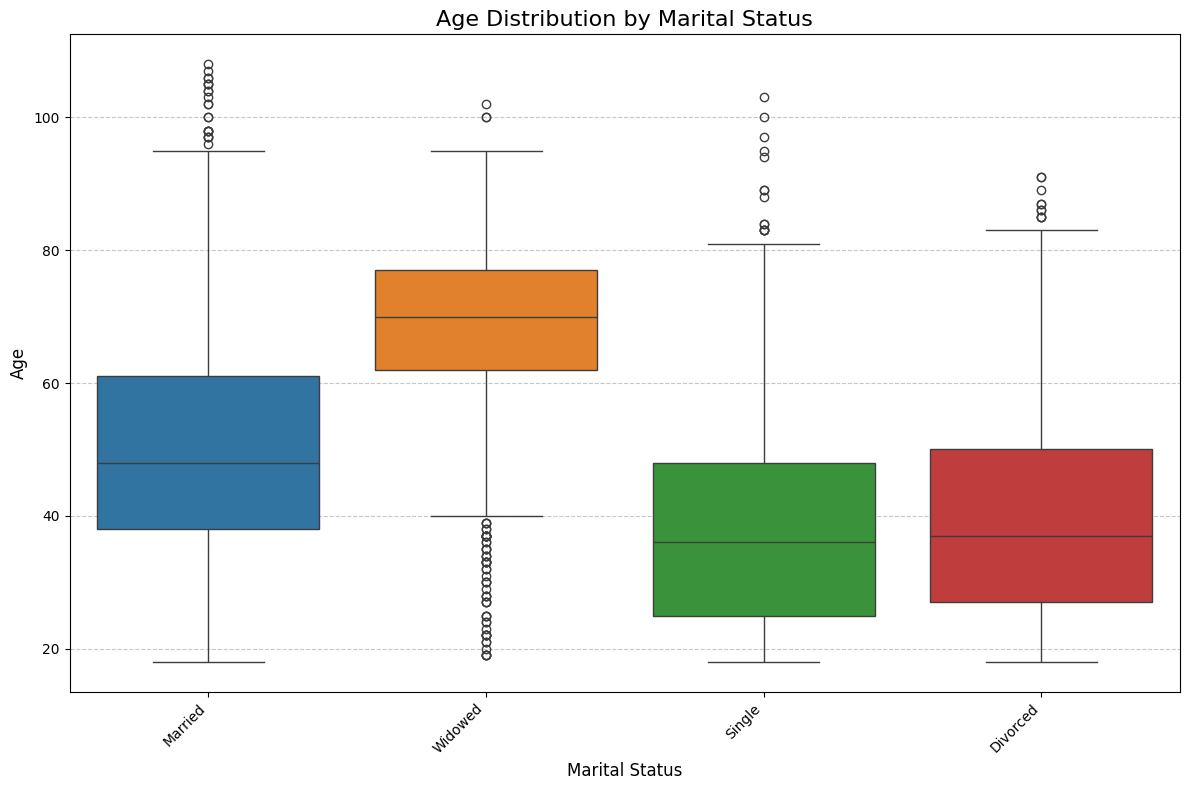

In [74]:
# Verify Marital Status values
print("Marital Status Distribution (Excluding Children):")
print(df['Marital Status'].value_counts(dropna=True))
# Filter out 'N/A'
df_adults = df[df['Marital Status'] != 'N/A']

# Plot: Box plot of Age by Marital Status (excluding 'N/A')
plt.figure(figsize=(12, 8))
sns.boxplot(x='Marital Status', y='Age', data=df_adults, palette='tab10')

# Customize the plot
plt.title('Age Distribution by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Age_Distribution_by_Marital_Status")
plt.show()

### Marital Status Rates (Adults)

Marital Status Distribution (All):
Marital Status
Single      3456
Married     2574
N/A         2193
Divorced     910
Widowed      410
Name: count, dtype: int64
Total Adults (excluding 'N/A'): 7350

Marital Status Rates (Excluding 'N/A'):
                Count  Rate (%)
Marital Status                 
Single           3456     47.02
Married          2574     35.02
Divorced          910     12.38
Widowed           410      5.58

Sum of Rates: 100.00%


C:\Users\seif\AppData\Local\Temp\ipykernel_19028\965399466.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_stats.index, y='Rate (%)', data=marital_stats, palette='tab10')


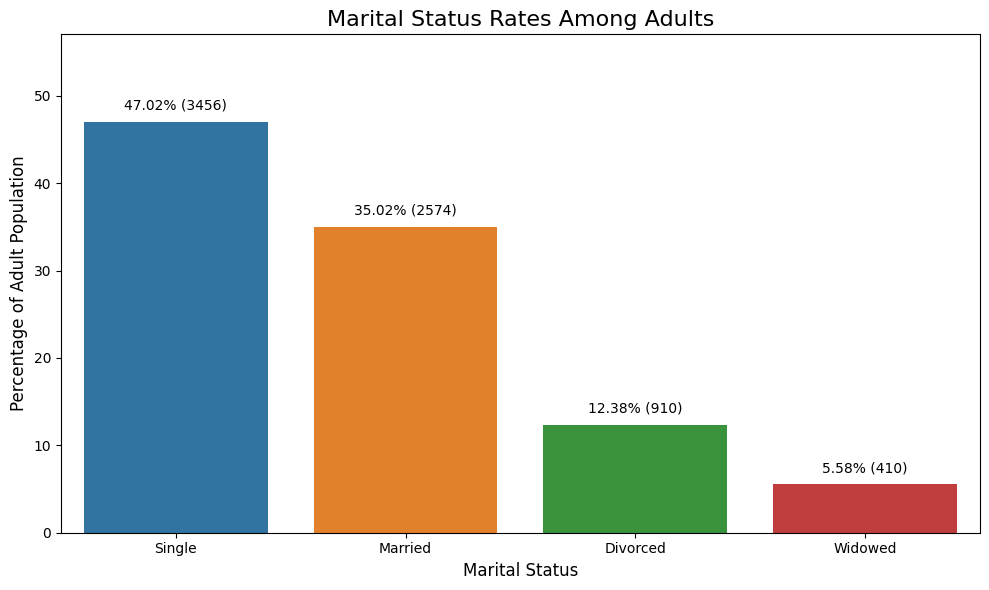

In [75]:
print("Marital Status Distribution (All):")
print(df['Marital Status'].value_counts(dropna=False))

# Filter out 'N/A'
df_adults = df[df['Marital Status'] != 'N/A']
total_adults = len(df_adults)

# Calculate counts and rates for each status (excluding 'N/A')
marital_counts = df_adults['Marital Status'].value_counts()
marital_rates = (marital_counts / total_adults * 100).round(2)

# Combine into a DataFrame
marital_stats = pd.DataFrame({
    'Count': marital_counts,
    'Rate (%)': marital_rates
})

# Print results for reference
print(f"Total Adults (excluding 'N/A'): {total_adults}")
print("\nMarital Status Rates (Excluding 'N/A'):")
print(marital_stats)

# Verify sum of rates
print(f"\nSum of Rates: {marital_rates.sum():.2f}%")

marital_stats = pd.DataFrame({
    'Count': marital_counts,
    'Rate (%)': marital_rates
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=marital_stats.index, y='Rate (%)', data=marital_stats, palette='tab10')

# Add percentage and count labels on top of bars
for i, (count, rate) in enumerate(zip(marital_stats['Count'], marital_stats['Rate (%)'])):
    plt.text(i, rate + 1, f'{rate}% ({count})', ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Marital Status Rates Among Adults', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Percentage of Adult Population', fontsize=12)
plt.ylim(0, max(marital_rates) + 10)  # Add space for labels
plt.tight_layout()
plt.savefig("Marital_Status_Rates_Among_Adults")
# Display the plot
plt.show()



### Occupation

C:\Users\seif\AppData\Local\Temp\ipykernel_19028\1550121174.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Occupation', data=occupation_data, palette='viridis')


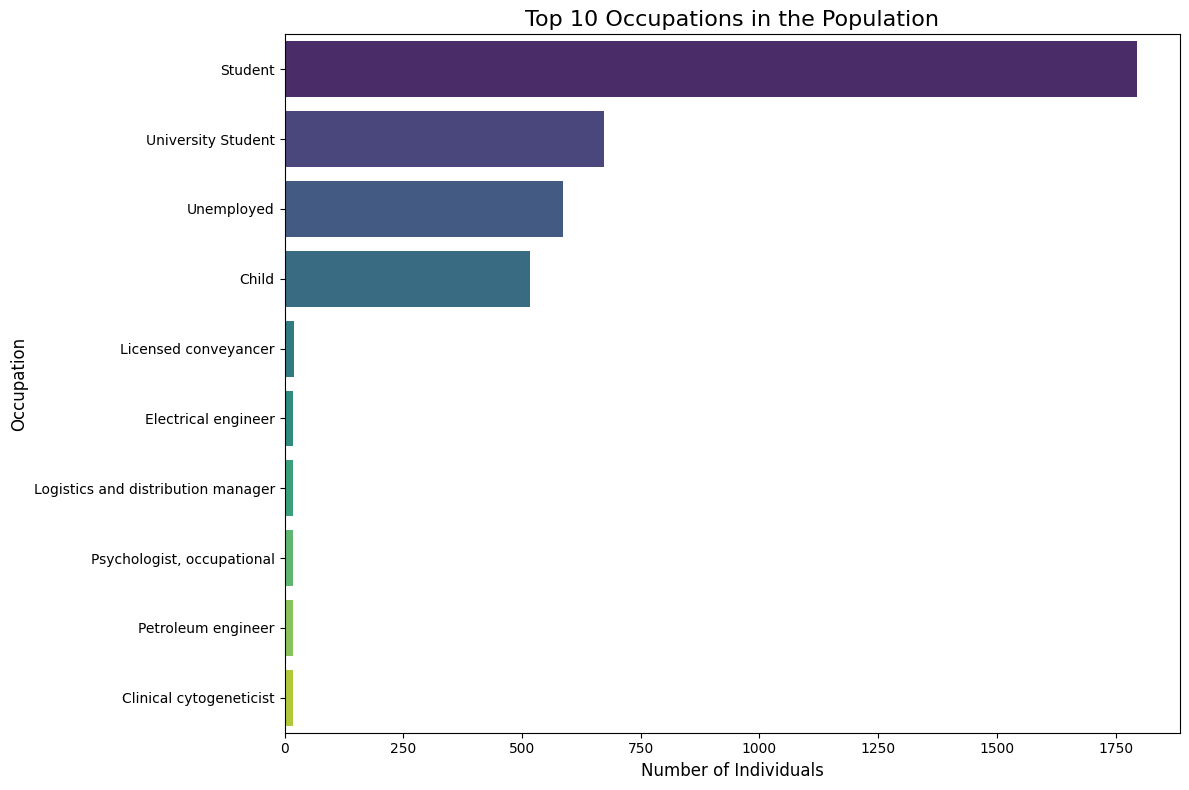

                                    Count  Percentage
Occupation                                           
Student                              1796       18.82
University Student                    672        7.04
Unemployed                            586        6.14
Child                                 517        5.42
Licensed conveyancer                   19        0.20
Electrical engineer                    18        0.19
Logistics and distribution manager     17        0.18
Psychologist, occupational             17        0.18
Petroleum engineer                     17        0.18
Clinical cytogeneticist                17        0.18


In [76]:
# Get the top 10 occupations
occupation_counts = df['Occupation'].value_counts().head(10)
total_pop = len(df)

# Calculate percentages
occupation_percent = (occupation_counts / total_pop * 100).round(2)

# Combine counts and percentages for display
occupation_data = pd.DataFrame({
    'Count': occupation_counts.values,
    'Percentage': occupation_percent
})

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Occupation', data=occupation_data, palette='viridis')



# Customize the plot
plt.title('Top 10 Occupations in the Population', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()
plt.savefig("Occupations_in_the_Population.png")
# Display the plot
plt.show()

# Print the data for reference
print(occupation_data)

### Commuters

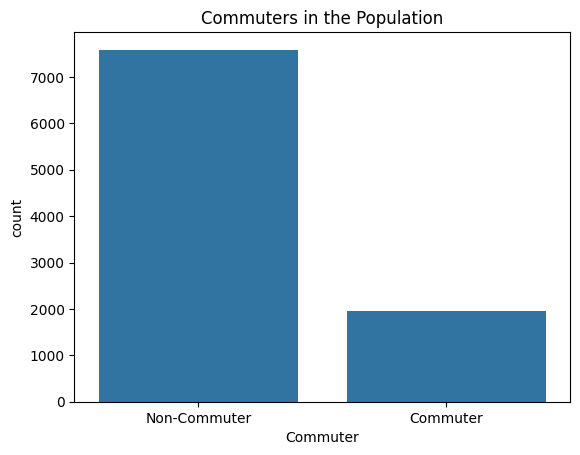

In [77]:
# Define keywords for commuter job types
commuter_keywords = ['university student', 'phd student', 'manager', 'sales', 'engineer', 'consultant', 'technician', 'analyst']

# Function to check if any commuter keyword appears in the occupation (case-insensitive)
def is_commuter(occupation):
    occupation_lower = str(occupation).lower()  # ensure it's a string and lowercase
    return any(keyword in occupation_lower for keyword in commuter_keywords)

# Apply the function
df['Commuter'] = df['Occupation'].apply(is_commuter)

# Plot the result
sns.countplot(x='Commuter', data=df)
plt.title('Commuters in the Population')
plt.xticks([0, 1], ['Non-Commuter', 'Commuter'])
plt.savefig("Commuters_in_the_Population.png")
plt.show()

In [78]:
# Show sample commuter occupations
df[df['Commuter'] == True]['Occupation'].value_counts().head(20)

Occupation
University Student                    672
Electrical engineer                    18
Engineer, chemical                     17
Logistics and distribution manager     17
Petroleum engineer                     17
Production engineer                    16
PhD Student                            16
IT sales professional                  13
Sales professional, IT                 13
Restaurant manager, fast food          13
Chemical engineer                      12
Broadcast engineer                     12
Contracting civil engineer             12
Engineer, aeronautical                 11
Management consultant                  11
Civil engineer, contracting            11
Engineer, mining                       11
Engineer, communications               11
Systems analyst                        11
Recruitment consultant                 11
Name: count, dtype: int64

### Unemployed Rate

Labor Force (18+, excl. Child/Students): 6542
Employed: 5956
Unemployed: 586
Unemployment Rate: 8.96%

Excluded Occupations Check:
Child: 517
Student: 1796
University Student: 672
PhD Student: 16


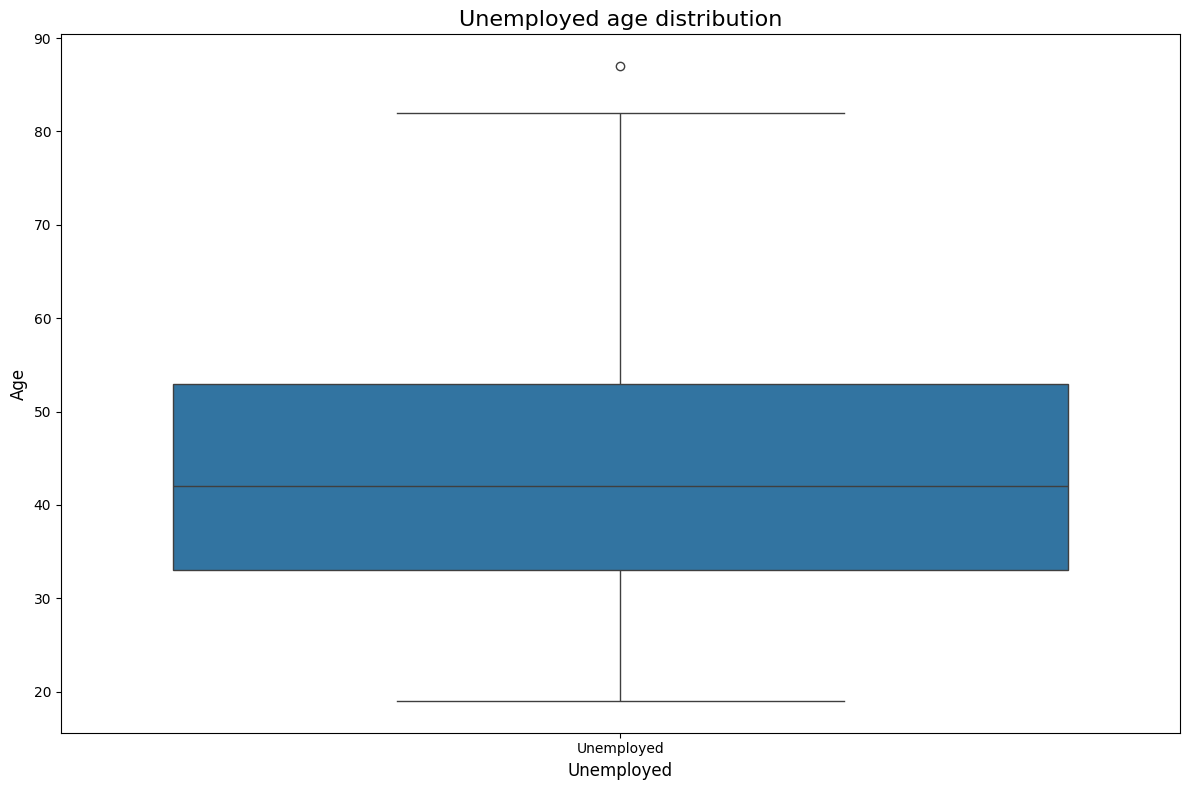

In [79]:
# Define exclusions
exclude_occupations = ['Child', 'Student', 'University Student', 'PhD Student']

# Filter to working-age population (18+), excluding students and children
labor_force_df = df[(df['Age'] >= 18) & (~df['Occupation'].isin(exclude_occupations))]

# Calculate employed and unemployed
unemployed = labor_force_df[labor_force_df['Occupation'] == 'Unemployed'].shape[0]
total_labor_force = labor_force_df.shape[0]
employed = total_labor_force - unemployed

# Unemployment rate
unemployment_rate = ((unemployed / total_labor_force) * 100) if total_labor_force > 0 else 0

# Print results
print(f"Labor Force (18+, excl. Child/Students): {total_labor_force}")
print(f"Employed: {employed}")
print(f"Unemployed: {unemployed}")
print(f"Unemployment Rate: {unemployment_rate:.2f}%")

# Verify occupation exclusions
print("\nExcluded Occupations Check:")
for occupation in exclude_occupations:
    count = df[df['Occupation'] == occupation].shape[0]
    print(f"{occupation}: {count}")

unemployed = labor_force_df[labor_force_df['Occupation'] == 'Unemployed']

plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Age', data=unemployed)
plt.title('Unemployed age distribution', fontsize=16)
plt.xlabel('Unemployed', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.savefig("Unemployed_age_distribution.png")
plt.show()

### Religion

Religion Distribution:
Religion
Christian    5892
Catholic     2123
Methodist    1176
Muslim        189
Sikh           94
Jewish         56
Agnostic       10
Orthodoxy       2
Pagan           1
Name: count, dtype: int64


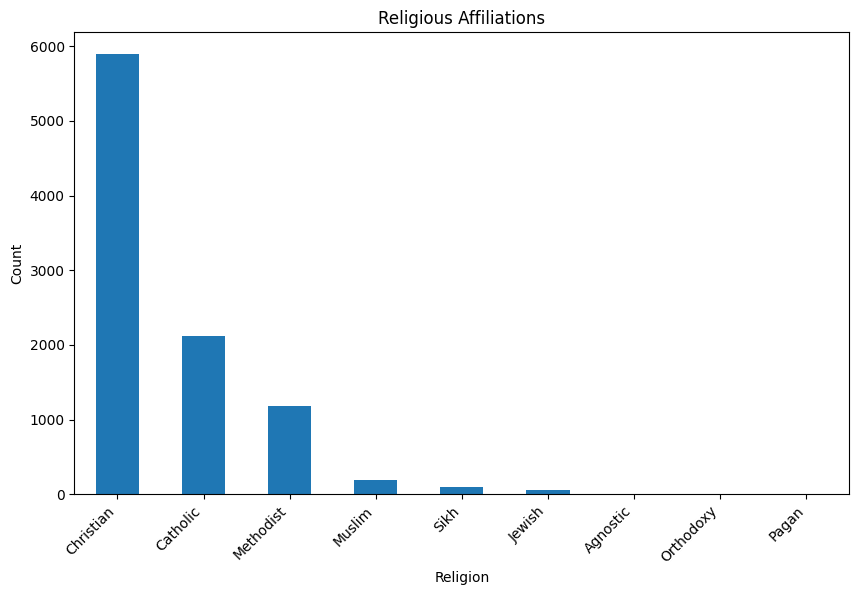

In [80]:
religion_counts = df['Religion'].value_counts()
print("Religion Distribution:")
print(religion_counts)

plt.figure(figsize=(10, 6))
religion_counts.plot(kind='bar')
plt.title('Religious Affiliations')
plt.xlabel('Religion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.savefig("religion_affiliation.png")
plt.show()